<a href="https://colab.research.google.com/github/J-Salt/IDS/blob/main/HW5/Project5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import the dataset & 3. Check for missing values
---

In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Company_data contains amounts spent on different types of advertisements and the resulting Sales
wineDF = pd.read_csv('https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv')

wineDF.isnull().sum() #Checking for missing values

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

###4. Prepare the data
---
Convert labels to numeric values

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_wineDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, wineDF.shape[1]):
    if wineDF.dtypes[i]=='object' or wineDF.dtypes[i]=='bool':
        encoded_wineDF[wineDF.columns[i]] = le.fit_transform(wineDF[wineDF.columns[i]])



print("-=========================")
print(wineDF)
print("-=========================")
encoded_wineDF

-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


###5. Create contingency tables
---


In [43]:
typeAlc = pd.crosstab(wineDF.iloc[:,0],wineDF.iloc[:,1]) #Type vs Alcohol Content
typeSug = pd.crosstab(wineDF.iloc[:,0],wineDF.iloc[:,2]) #Type vs Sugar Content

print(typeAlc, '\n')
print(typeSug)

Alcohol_flag  High   Low
Type                    
Red            485   600
White         1176  1084 

Sugar_flag  High  Low
Type                 
Red          237  848
White       1382  878


###6. Plot the cross tabs from above
---

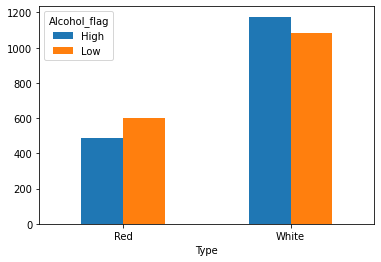

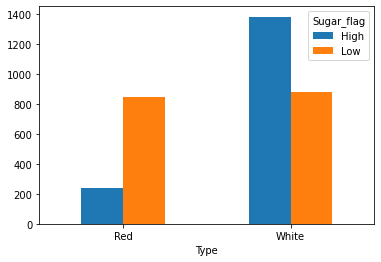

In [45]:
barplotAlc = typeAlc.plot.bar(rot=0)
barplotSug = typeSug.plot.bar(rot=0)

###7. Probabilities
---

In [68]:
# part a
probRed = (wineDF.Type == 'Red').sum() / len(wineDF)
probWhite = (wineDF.Type == 'White').sum() / len(wineDF) #or 1 - prob1
print("Probability of Red:   ",probRed)
print("Probability of White: ",probWhite)

# part b
probHighA = (wineDF.Alcohol_flag == 'High').sum() / len(wineDF)
probLowA = (wineDF.Alcohol_flag == 'Low').sum() / len(wineDF) #or 1 - prob1
print("Probability of High Alc Content: ",probHighA)
print("Probability of Low Alc Content:  ",probLowA)

# part c
probHighS = (wineDF.Sugar_flag == 'High').sum() / len(wineDF)
probLowS = (wineDF.Sugar_flag == 'Low').sum() / len(wineDF) #or 1 - prob1
print("Probability of High Sugar Content: ",probHighS)
print("Probability of Low Sugar Content:  ",probLowS)

# high and Red / red
# part d


conProb1 = probHighA*probRed / probRed
conProb2 = probLowA*probRed / probRed #or 1 - prob1
print("Conditional Probability of High Alc Content: ",conProb1)
print("Conditional Probability of Low Alc Content:  ",conProb2)


#part e
conProb1 = probHighS*probRed / probRed
conProb2 = probLowS*probRed / probRed #or 1 - prob1
print("Conditional Probability of High Sugar Content: ",conProb1)
print("Conditional Probability of Low Sugar Content:  ",conProb2)

Probability of Red:    0.3243647234678625
Probability of White:  0.6756352765321375
Probability of High Alc Content:  0.49656203288490286
Probability of Low Alc Content:   0.5034379671150971
Probability of High Sugar Content:  0.48400597907324366
Probability of Low Sugar Content:   0.5159940209267564
Conditional Probability of High Alc Content:  0.4965620328849028
Conditional Probability of Low Alc Content:   0.5034379671150971
Conditional Probability of High Sugar Content:  0.48400597907324366
Conditional Probability of Low Sugar Content:   0.5159940209267564


###8. Creating the NB Classifier
---

In [85]:
# 80-20 Split

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_wineDF.iloc[:,1:3]
y = encoded_wineDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=3, shuffle=True, test_size=0.20, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1783             1           0
3089             0           0
3060             0           1
1431             0           1
1622             1           1
...            ...         ...
2269             1           0
1222             1           1
1047             1           1
244              1           1
2796             0           1

[2676 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1204             1           1
1644             1           0
768              0           0
1010             1           0
1147             1           1
...            ...         ...
2527             0           1
2449             0           0
3244             0           0
754              0           1
337              0           1

[669 rows x 2 columns]


0.7406576980568012
0.695067264573991


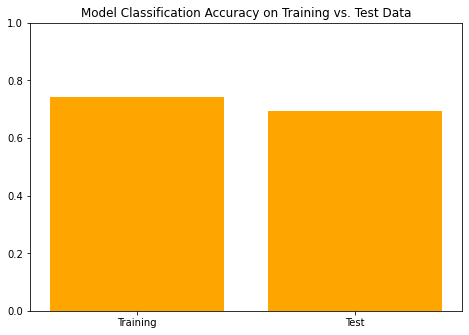

In [86]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
print(NBmodel.score(X_train, y_train))
print(NBmodel.score(X_test, y_test))
# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuracy on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [87]:
# 70-30 Split

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_wineDF.iloc[:,1:3]
y = encoded_wineDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=3, shuffle=True, test_size=0.30, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1181             1           1
458              1           1
3266             0           0
2452             0           0
2688             0           1
...            ...         ...
2644             0           0
1222             1           1
2522             0           0
244              1           1
716              1           1

[2341 rows x 2 columns]
      Alcohol_flag  Sugar_flag
484              0           1
120              0           1
1231             1           1
1317             1           1
3091             0           1
...            ...         ...
1967             1           0
868              0           0
1560             0           0
444              1           1
1064             1           1

[1004 rows x 2 columns]


0.7381460914139256
0.7161354581673307


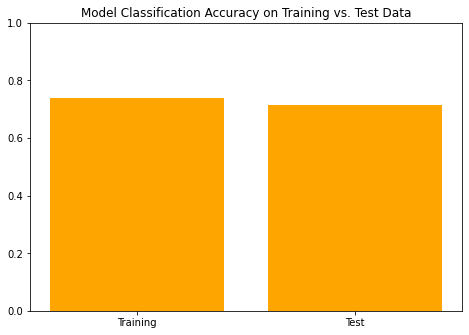

In [88]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
print(NBmodel.score(X_train, y_train))
print(NBmodel.score(X_test, y_test))
# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuracy on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [89]:
#60-40 Split

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_wineDF.iloc[:,1:3]
y = encoded_wineDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=3, shuffle=True, test_size=0.40, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1133             1           1
269              1           1
1359             0           1
3247             0           1
65               0           1
...            ...         ...
2499             0           1
1222             1           1
2833             0           0
244              1           1
2112             1           0

[2007 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1441             0           1
678              1           0
1575             0           1
1904             1           0
644              1           0
...            ...         ...
1854             1           0
1530             0           1
369              1           1
1867             1           0
2412             1           0

[1338 rows x 2 columns]


0.7384155455904334
0.7212257100149477


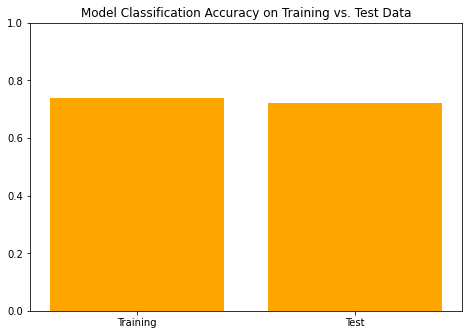

In [90]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
print(NBmodel.score(X_train, y_train))
print(NBmodel.score(X_test, y_test))
# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuracy on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [91]:
# 50-50 Split

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_wineDF.iloc[:,1:3]
y = encoded_wineDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=3, shuffle=True, test_size=0.50, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1769             1           0
401              0           1
1903             1           0
279              1           1
99               1           1
...            ...         ...
708              0           0
1222             1           1
2356             1           1
2137             1           0
2219             1           1

[1672 rows x 2 columns]
      Alcohol_flag  Sugar_flag
744              1           0
3342             0           1
1350             0           1
1998             1           0
2413             1           1
...            ...         ...
913              0           1
1296             1           1
3084             0           0
1854             1           0
1454             0           1

[1673 rows x 2 columns]


0.7326555023923444
0.7304243873281531


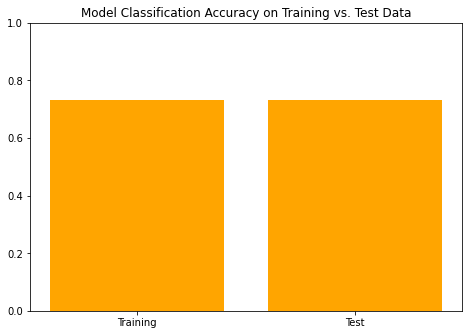

In [92]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
print(NBmodel.score(X_train, y_train))
print(NBmodel.score(X_test, y_test))
# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuracy on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

###Summary
---
From this data it was hard to find a correlation between alcohols sugar content and alcohol content to its type. I believe this is what made the graphs at the end fairly close between training and testing. I also am unsure if I calculated the conditional probabilites correctly as I have an extremely hard time understanding probabiity theory. I believe instead of multiplying the A and B I should have been only selecting the number of rows that are both A and B (and using that to get the probability of A and B) then dividing by the probability of B. For the life of me I could not remember or find how to select rows based on two different parameters.